In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [29]:
df = pd.read_csv(r'D:\VsCOde\ML by python\income data.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [30]:
df = df.dropna()

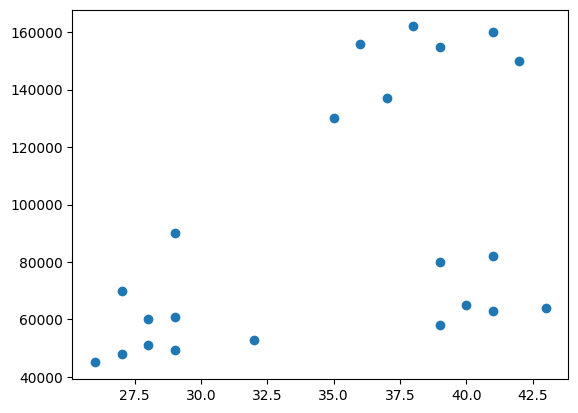

In [31]:
plt.scatter(df['Age'], df['Income($)'])

In [32]:
sse = []
for k in range(1, (len(df)//2)+1):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [33]:
sse

[39748148458.545456,
 3318233941.161905,
 1606229737.6785712,
 1058800432.7238097,
 296500418.0952381,
 242050408.2952381,
 188050327.62857142,
 160833588.66666666,
 106383578.86666666,
 76133574.86666667,
 47966777.53333333]

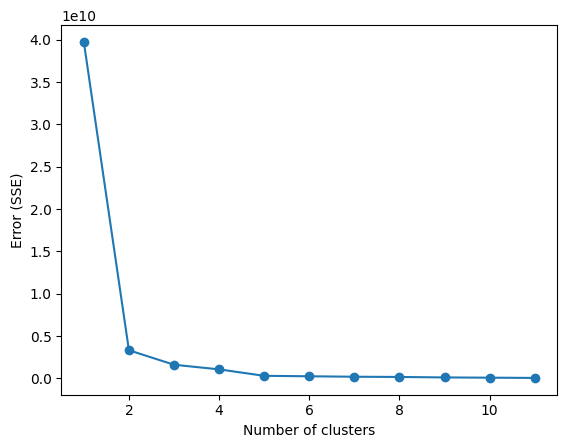

In [34]:
plt.xlabel('Number of clusters')
plt.ylabel('Error (SSE)')
plt.plot(range(1, (len(df)//2)+1), sse, marker='o')

In [35]:
km = KMeans(n_clusters = 3) #from the elbow method we can see that 3 is a good number of clusters

In [36]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [37]:
df['Cluster'] = y_pred

In [38]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


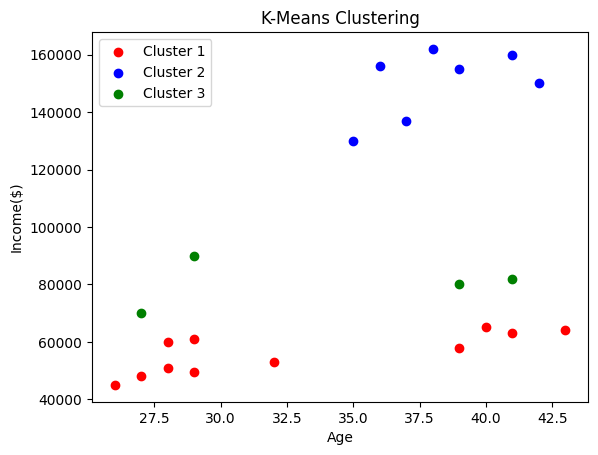

In [39]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='red', label='Cluster 1')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Cluster 2')
plt.scatter(df3['Age'], df3['Income($)'], color='green', label='Cluster 3')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('K-Means Clustering')
plt.legend()

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(df[['Age', 'Income($)']])

MinMaxScaler()

In [42]:
df[['Age', 'Income($)']] = scaler.transform(df[['Age', 'Income($)']])

In [43]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [44]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [45]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


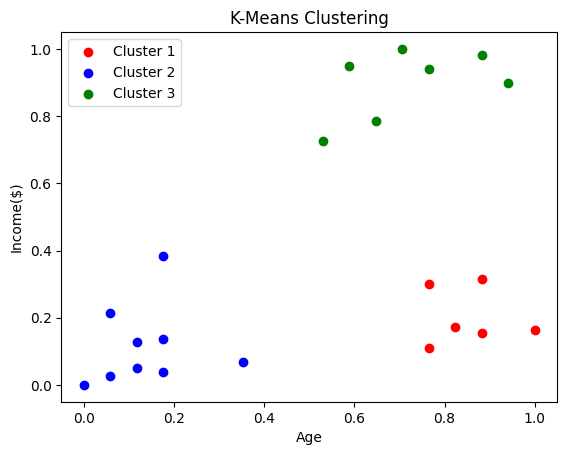

In [46]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='red', label='Cluster 1')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Cluster 2')
plt.scatter(df3['Age'], df3['Income($)'], color='green', label='Cluster 3')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('K-Means Clustering')
plt.legend()